# Convergencia do Zerinho ou Um

http://mapadobrincar.folha.com.br/brincadeiras/formulas-de-escolha/338-zero-ou-um

Todos os participantes dizem "zero ou um" e colocam as mãos para a frente, mostrando um dedo ou nenhum.

Se alguém colocar sozinho o um ou o zero, sai da brincadeira.

O resto continua, até ficarem só dois participantes, que decidem a brincadeira no par ou ímpar.

Pergunta: a medida que voce fica popular e conquista amigos, 
quantas jogadas sao necessarias para convergir o zerinho ou um (ou zezinho soltou um pum em algumas rodas de poucos amigos)

In [54]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [55]:
# grupo de amigos
galera = np.arange(3,20)
# guardar informacao de convergencia para cada grupo de amigos
converge_galera = {}
media_galera = {}
desvio_galera = {}
min_galera = {}
max_galera = {}
numero_interacoes = 200
# testa convergencia para cada grupo de amigos
for amigos in galera:
    for interacao in xrange(numero_interacoes):
        i = 0
        while True:
            # jogadas de zerinho ou um
            zero_um = np.random.randint(0, 2, size=amigos)
            #print i, zero_um
            i += 1
            # uma maneira de testar quem sai
            if sum(zero_um) == 1 or sum(zero_um) == amigos-1:
                #print i,'converge'
                if converge_galera.has_key(amigos):
                    converge_galera[amigos].append(i)
                else:
                    converge_galera[amigos] = [i]
                break
    media_galera[amigos] = int(np.mean(converge_galera[amigos]))
    desvio_galera[amigos] = int(np.std(converge_galera[amigos]))
    min_galera[amigos] = int(np.min(converge_galera[amigos]))
    max_galera[amigos] = int(np.max(converge_galera[amigos]))



In [56]:
print media_galera
print desvio_galera
print min_galera
print max_galera

{3: 1, 4: 2, 5: 2, 6: 5, 7: 8, 8: 16, 9: 28, 10: 55, 11: 93, 12: 168, 13: 303, 14: 589, 15: 1155, 16: 1891, 17: 3834, 18: 7706, 19: 13603}
{3: 0, 4: 1, 5: 2, 6: 4, 7: 8, 8: 16, 9: 30, 10: 48, 11: 78, 12: 177, 13: 256, 14: 579, 15: 1191, 16: 1854, 17: 3711, 18: 8521, 19: 14889}
{3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 4, 15: 1, 16: 1, 17: 45, 18: 62, 19: 13}
{3: 4, 4: 8, 5: 14, 6: 22, 7: 46, 8: 101, 9: 157, 10: 256, 11: 385, 12: 1168, 13: 1192, 14: 3986, 15: 8602, 16: 12006, 17: 19657, 18: 52173, 19: 98072}


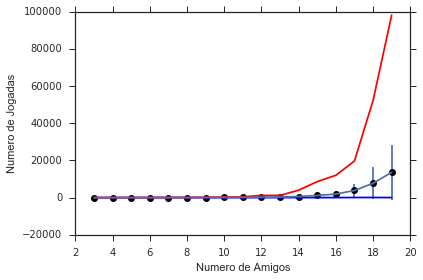

In [57]:
plt.plot(media_galera.keys(),media_galera.values(),'ko')
plt.plot(min_galera.keys(),min_galera.values(),'b-')
plt.plot(max_galera.keys(),max_galera.values(),'r-')

plt.errorbar(media_galera.keys(),media_galera.values(), yerr=desvio_galera.values())
plt.xlabel('Numero de Amigos')
plt.ylabel('Numero de Jogadas')